*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# In Depth: Linear Regression

Just as naive Bayes (discussed earlier in [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)) is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

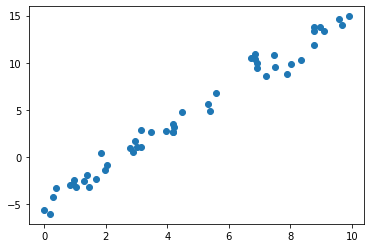

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

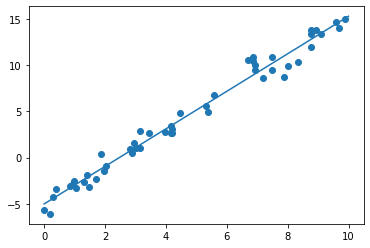

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000109
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but we will relax this as well.

In [6]:
answer, residuals, rank, ss = np.linalg.lstsq(X,y)
answer

<ipython-input-6-a6b0ac7bc915>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  answer, residuals, rank, ss = np.linalg.lstsq(X,y)


array([ 1.52587196, -1.97000441,  1.03220321])

In [7]:
#similar with np (can see same method as lecture, matrix mult) 
#rather than sk learn
np.linalg.inv(X.T @ X) @ np.matmul(X.T,y)

array([ 1.52587196, -1.97000441,  1.03220321])

# Non-linear Regression
not in sklearn but in scipy

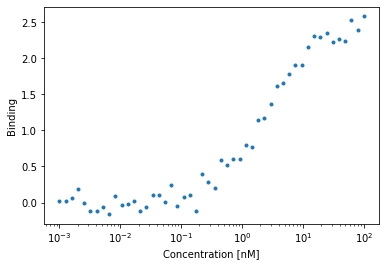

In [8]:
X = np.logspace(-3, 2)
Y = 1.0 * X / (1.0 + 0.4 * X) + 0.1 * rng.randn(*X.shape)

plt.semilogx(X, Y,'.');
plt.xlabel('Concentration [nM]')
plt.ylabel('Binding');
#e.g. from curve can calc Kd for binding process

In [9]:
#input xx=binding and conc (two variables min to max), lig=vector of concentrations
# NLLS u must know vague curve shape (bioEs know protein binding michaelis menten is log)
def klotz1(xx, lig):
    """ A function defining our binding curve. """
    return (xx[1]*lig)/(1 + xx[0]*lig)

def ls_obj_k1(xx, ligs, data):
    """ A function that returns the residuals between our prediction and the data. """
    return(data - klotz1(xx,ligs))
#doesnt return prediction, but the error (diff/residuals btwn pred and data)

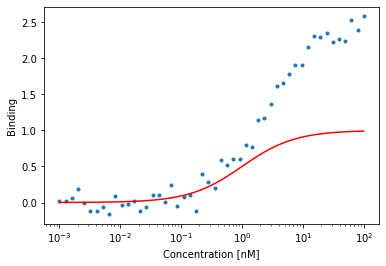

In [10]:
# x0 is starting point. chose [1. 1.] but arbitrary for simple problem
x0 = np.ones(2)
plt.semilogx(X, Y,'.');
plt.semilogx(X,klotz1(x0,X),'r-')
plt.xlabel('Concentration [nM]')
plt.ylabel('Binding');

In [16]:
# least squares calls  X, Y in args which come from "data" above 
res = sp.optimize.least_squares(ls_obj_k1, x0, args=(X,Y))
assert res.success
res

 active_mask: array([0., 0.])
        cost: 0.2682973267102191
         fun: array([ 0.02424818,  0.02015929,  0.06607202,  0.17917787, -0.01209444,
       -0.12337274, -0.11830851, -0.0666724 , -0.16754211,  0.08234816,
       -0.05001693, -0.03134547, -0.00050088, -0.14005531, -0.08662743,
        0.06684665,  0.06106814, -0.04530454,  0.17981496, -0.13212301,
       -0.0364342 , -0.02549243, -0.28229348,  0.19007154,  0.03212011,
       -0.10995212,  0.19848799,  0.05064506,  0.03359586, -0.07161059,
       -0.00192119, -0.16677103,  0.06367229, -0.05481049, -0.00535691,
        0.10022523,  0.00746939,  0.00440858,  0.00515641, -0.09632243,
        0.06022978,  0.13068936,  0.052034  ,  0.06450057, -0.11182131,
       -0.11094542, -0.168307  ,  0.09896796, -0.04970287,  0.11567939])
        grad: array([8.84277466e-08, 2.91160182e-09])
         jac: array([[ 1.01793557e-06, -9.99596558e-04],
       [ 1.62818469e-06, -1.26420993e-03],
       [ 2.60397792e-06, -1.59882702e-03],
     

[1.00000000e-03 1.26485522e-03 1.59985872e-03 2.02358965e-03
 2.55954792e-03 3.23745754e-03 4.09491506e-03 5.17947468e-03
 6.55128557e-03 8.28642773e-03 1.04811313e-02 1.32571137e-02
 1.67683294e-02 2.12095089e-02 2.68269580e-02 3.39322177e-02
 4.29193426e-02 5.42867544e-02 6.86648845e-02 8.68511374e-02
 1.09854114e-01 1.38949549e-01 1.75751062e-01 2.22299648e-01
 2.81176870e-01 3.55648031e-01 4.49843267e-01 5.68986603e-01
 7.19685673e-01 9.10298178e-01 1.15139540e+00 1.45634848e+00
 1.84206997e+00 2.32995181e+00 2.94705170e+00 3.72759372e+00
 4.71486636e+00 5.96362332e+00 7.54312006e+00 9.54095476e+00
 1.20679264e+01 1.52641797e+01 1.93069773e+01 2.44205309e+01
 3.08884360e+01 3.90693994e+01 4.94171336e+01 6.25055193e+01
 7.90604321e+01 1.00000000e+02]
[0.40357691 1.01877617]


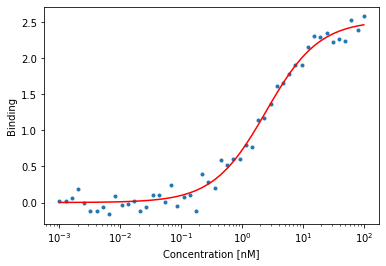

In [18]:
# from above resolut  x: array([0.40357691, 1.01877617])
print(X)
print(res.x)
plt.semilogx(X, Y,'.');
plt.semilogx(X,klotz1(res.x,X),'r-')
plt.xlabel('Concentration [nM]')
plt.ylabel('Binding');
# fits!